# Lab04: Timeseries Data
![Time Series](https://uploads-ssl.webflow.com/5ec4696a9b6d337d51632638/6033e511c460742564ad33f7_63C156C6-39FD-4AB8-A947-0CA2F2B58180-p-800.png)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Time Series Data Structures
Pandas offers additional data structure for working with date and time. A single point in time is represented as a ``Timestamp``.

In [3]:
pd.to_datetime('2019-12-03 1:35pm')

Timestamp('2019-12-03 13:35:00')

In [4]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

The above date is interpreted as ``month/day/year``. The order can be changed by setting the ``dayfirst`` parameter.

In [5]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

If we supply a list or array of strings as input to ``to_datetime()``, a sequence of date/time values in a ``DatetimeIndex`` object is returned. This is the core data structure that powers much of pandas time series functionality.

In [6]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

If we pass a number of strings in the same date/time format, we can explicitly specify it with the ``format`` parameter. This can significantly speed up the performance for very large datasets.

In [7]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [8]:
pd.to_datetime(['2/25/2010', '8/6/2017', '12/15/2012'], format='%m/%d/%Y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Creating a TimeSeries DataFrame
Daily Open Power System Data from Germany inlcuding data about electricity consumption, wind power production and solar power production for 2006-2017, everything in GWh. The data is from [this tutorial](https://github.com/Open-Power-System-Data/time_series).

First, read the data into `df` and display the head. The data can be found [here](https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/opsd_germany_daily.csv).

In [9]:
# YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/opsd_germany_daily.csv')
df.head()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [10]:
# Ignore this cell - this is for automatic testing.

Describe the data frame.

In [11]:
# YOUR CODE HERE
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Show the datatypes that are used in each column. Which datatype is not very easy useable for our usecase?

In [12]:
# YOUR CODE HERE
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

As you can see, the Date is of type _object_. But we want to use it as a _dateime64_ object. To convert it, have a look to the [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function. Print the retulting datatypes.

In [13]:
# YOUR CODE HERE
df['Date'] =  pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [14]:
# Ignore this cell - this is for automatic testing.

In the following, one of the dates (`one_day`) is taken. You can easily extract all attributes, like year, day, month, hour, etc. from this object. In our case, the time is not set, thus it is set to 00:00:00. Play around a bit.

In [15]:
one_day = df.iloc[0, 0]
print(one_day)
print(one_day.year)
print(one_day.month)
print(one_day.day)

2006-01-01 00:00:00
2006
1
1


### Use Date  as Index
Instead of using arbritary integer values as the index, try it with the date. The date is unique anyways. Print the head.

In [16]:
# YOUR CODE HERE
df = df.set_index("Date")
df.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
# Ignore this cell - this is for automatic testing.

### Adding New Columns
Add new columns named _Year_, _Month_ (Name, Jan-Dec), and _Weekday_ (Mo-So) and fill it with the corresponding values from the index. For further functionality of the the DateTime class have a look in the [API docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html).

Print the head.

In [18]:
# YOUR CODE HERE
df["Year"] = df.index.year
df["Month"]= df.index.month_name()
df["Day"] = df.index.day_name()
df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,January,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,January,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,January,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,January,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,January,Thursday


In [19]:
# Ignore this cell - this is for automatic testing.

### Timebased Indexing
For selecting a special date, just use `loc` with the date as a string. If a whole month shall be returned, ommit the day in the string. Play around a bit.

In [20]:
df.loc['2014-12-11']

Consumption    1631.714
Wind            487.782
Solar            10.985
Wind+Solar      498.767
Year               2014
Month          December
Day            Thursday
Name: 2014-12-11 00:00:00, dtype: object

In [21]:
df.loc['2012-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2012-03-01,1411.553,62.293,40.042,102.335,2012,March,Thursday
2012-03-02,1402.006,39.972,38.665,78.637,2012,March,Friday
2012-03-03,1186.275,107.629,55.380,163.009,2012,March,Saturday
2012-03-04,1072.078,80.685,32.054,112.739,2012,March,Sunday
2012-03-05,1388.816,154.206,32.907,187.113,2012,March,Monday
2012-03-06,1433.166,61.690,83.002,144.692,2012,March,Tuesday
2012-03-07,1455.451,157.059,75.157,232.216,2012,March,Wednesday
2012-03-08,1412.181,150.182,44.725,194.907,2012,March,Thursday
2012-03-09,1399.515,126.102,92.597,218.699,2012,March,Friday


## Let's plot something!
In the following you can use the pandas plot functionality, and refine the plots using matplotlib (makes it easier).

First, plot the `Consumptions`. Use a `figsize=(11,5)` and a `linewidth=.5`. Use axis labeling and a title.

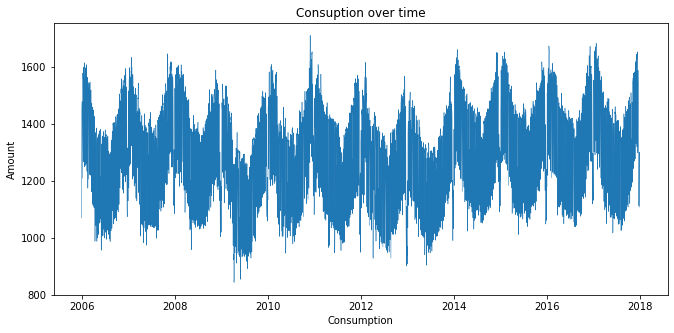

In [22]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize =(11,5))
ax.set_xlabel("Consumption")
ax.set_ylabel("Amount")
plt.title("Consuption over time")
plt.plot(df.index, df["Consumption"], linewidth=.5)

Hmm.. Here we do not see too much. Let's try a different styling. can we see a pattern (difference between weekdays and weekends)?

Plot the same as before, but with a different `marker` and `linestyle=None`. See [the docs](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html).

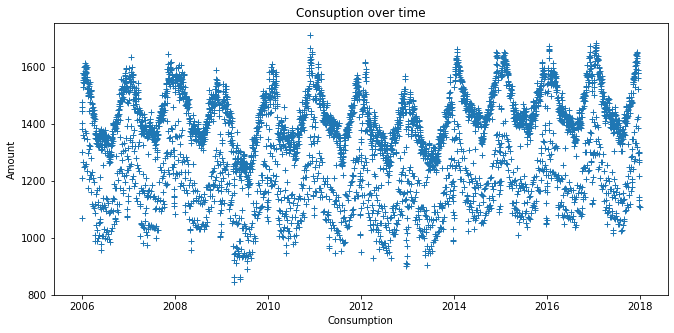

In [23]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize =(11,5))
ax.set_xlabel("Consumption")
ax.set_ylabel("Amount")
plt.title("Consuption over time")
plt.plot(df.index, df["Consumption"], linewidth=.5, linestyle='None', marker='+')

Now, you want to add two additional subplots for `Solar` and `Wind`. Again, use pandas to plot the data (same parameter as before). Adjust the `figsize` that one can see the data. For subplots with pandas, have a look [in the docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).

Don't forget about axis labeling!

Text(0.5, 0.98, 'Consumtion, Solar, Wind ')

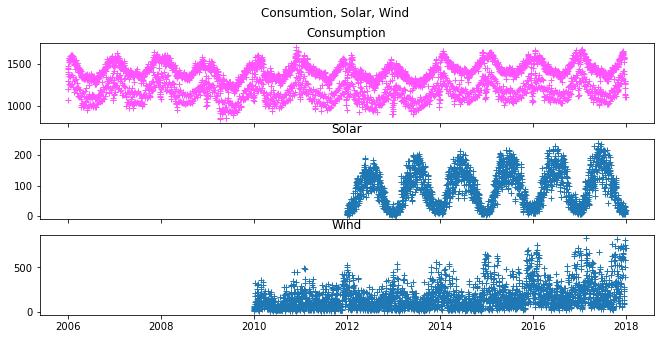

In [28]:
# YOUR CODE HERE
# cols = ['Consumption', 'Solar', 'Wind']
# axes = df[cols].plot(marker='.', linestyle='None', figsize=(11, 9), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily Totals (GWh)')
fig, ax = plt.subplots(figsize =(11,5),nrows=3, sharex=True)
ax[0].plot(df.index,df['Consumption'], linestyle='None', marker='+',linewidth=.5, color='#ff54ff')
ax[0].set_title("Consumption")
ax[1].plot(df.index,df['Solar'], linestyle='None', marker='+',linewidth=.5)
ax[1].set_title("Solar")
ax[2].plot(df.index,df['Wind'], linestyle='None', marker='+',linewidth=.5)
ax[2].set_title("Wind")
fig.suptitle("Consumtion, Solar, Wind ")


## Investigating Patterns
... by looking at slices of the data or grouping information ...

Plot the `Consumption` for one dedicated year.

<AxesSubplot:title={'center':'Consuption over time'}, xlabel='Date', ylabel='Amount'>

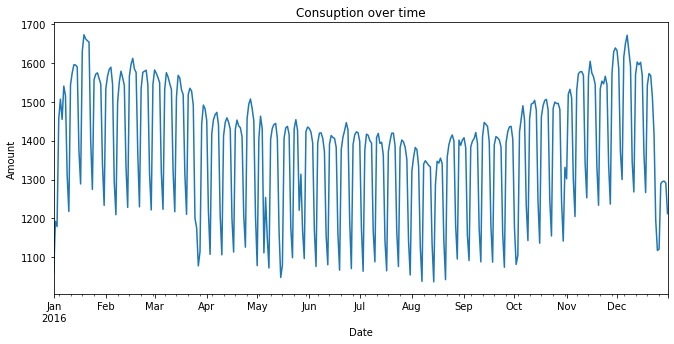

In [ ]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize =(11,5))
ax.set_xlabel("Consumption")
ax.set_ylabel("Amount")
plt.title("Consuption over time")
df.loc['2016-01-01':"2016-12-31",'Consumption'].plot()

Let's try to group the data (e.g. monthly). You know an appropriate visualization for that!

ValueError: Cannot use `hue` without `x` and `y`

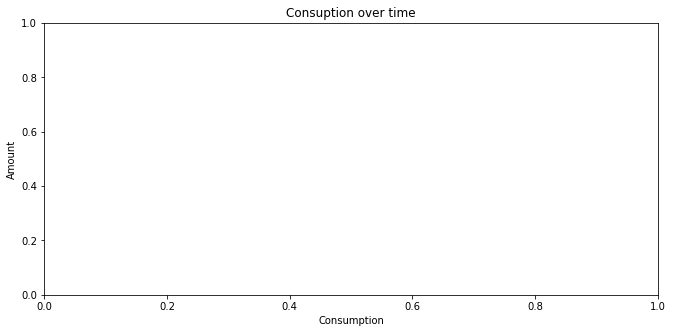

In [31]:
# YOUR CODE HERE

## Comparing Consumption and Production
### Resampling the Data
For further analyisis, a daily view is maybe not optimal. Let's resample our data to a monthly view (sum of data in a month).

Create a new data frame with the columns `'Consumption', 'Wind', 'Solar', 'Wind+Solar'`. 
Use [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) on that data to resample it on a monthly view and use [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.sum.html?highlight=sum#pandas.core.resample.Resampler.sum) on that resampled data to compute the monthly grouped sum.

Print the tail.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Plot `'Consumption', 'Wind', 'Solar'` in one plot. Use different colors and different styles. Use a legend and don't forget about axis labeling.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Use Your Own Data
Go to [Wiki Pageviews](https://tools.wmflabs.org/pageviews/) and download a dataset of the pageviews of a Wikipedia page of your choice. 
- Enter the page name(s).
- Click into the Dates field and choose "All time".
- Download the .csv file.

Next, load the data into a pandas ``DataFrame``:
- Change the index to a ``DateTimeIndex``.
- Inspect the dataset (missing values?)
- Add additional columns (Weekday, Month)
- Try to find patterns:
  - selecting just one year/month
  - grouping monthly/weekly

Finally, for the submission, show at least one plot with a weekly aggregate of numbers.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Inspiration/Further Reading
- [Time Series Analysis with Pandas (Tutorial)](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Working with Time Series in Python (Tutorial)](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)